# **FINAL REPORT**

<span style="font-size: 15px;">

**Broad question:** What player characteristics and behaviours are most predctive of subscribing to a game-related newsletter, and how do these features differ across various player types?

**Specific question:** Can the amount of hours playing video games and the age of the player predict their subscription status to a gaming newsletter? Additionally, does this predictive relationship differ across players of different expereince levels?
</span>

### **Background Information**

<span style="font-size: 15px;">

A reaearch group in Computer Science at UBC collected data about how people play video games. They are recording players' actions actions as the players navigate through the Minecraft server that the group have set up. They need to hone in on specific recruitment efforts, and make sure they have enough resources (i.e., software licesnses) to handle the number of players they attract. Through our final report, we are targetting the effects that the variables played_hours and age have on the players' subscription status.

<span>


In [1]:
library(tidyverse)
url <- ("https://raw.githubusercontent.com/msyr125/DSCI-100-GROUP-PROJECT/refs/heads/main/players.csv")
players <- read_csv(url)
head(players)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


### **Data Description**

<span style="font-size: 15px;">

The dataset players.csv contains information about individual Minecraft players collected by UBC research group studying player behaviour. It includes demogrpahoc data, playtime, and expereince level for each player along with whether thy subscribed to a game-related newsletter.
    
**Number of observations:** 196 <br>
**Number of variables:** 7 <br>
**File name:** players.csv
</span>  

| Variable Name | Type | Description | Example Value |
|:--------------|:----:|:-----------:|:-------------:|
| experience | chr | Player's experience level (e.g. "Beginner", "Amateur", "Regular", "Pro", "Veteran") | "Pro" |
| subscribe | lgl | Whether the player subscribed to the newsletter (TRUE = subscribed, FALSE = not subscribed) | TRUE |
| hashedEmail | chr | Anonymized email identifier (used for unique player identification) | "f19e136ddd..." |
| played_hours | dbl | Total hours the player spent playing on the server | 30.3 |
| name | chr | Player's in-game name | "Morgan" |
| gender | chr | Player's gender, typically "Male" or "Female" (also includes "Other", "Prefer not to say", "Two-Spirited", "Agender", and "Non-binary") | "Male" | 
| Age | dbl | Player's age in years | 21 |

#### **Summary Statistics**
<span style="font-size: 15px;">
    
**Experience:**
* Pro = 14
* Veteran = 48
* Regular = 36
* Amateur = 63
* Beginner = 35

**Subscribers:**
* Number of people subscribed = 144
* Number of people not subscribed = 52

**Hours Played:**
* Minimum hours played = 0
* Maximum hours played = 223.1
* Mean hours played = 5.85
* Standard deviation of hours played = 28.36

**Age of Players:**
* Minimum age of player = 9
* Maximum age of player = 58
* Mean age of player = 21.14
* Standard deviation of player age = 7.39

**Gender Distribution of Players:**
* Male players = 124
* Female players = 37
* Non-binary players = 7
* Two-Spirited players = 6
* Prefer not to say = 11
</span>

In [2]:
# Code to perform summary statistics

filter_pro <- players |>
    filter(experience == 'Pro')
## Pro = 14

filter_amateur <- players |>
    filter(experience == 'Amateur')
## Amateur = 63

filter_vet <- players |>
    filter(experience == 'Veteran')
## Veteran = 48

filter_beg <- players |>
    filter(experience == 'Beginner')
## Beginner = 35

filter_reg <- players |>
    filter(experience == 'Regular')
## Regular = 36

filter_sub <- players |>
    filter(subscribe == 'FALSE')
## TRUE = 144, FALSE = 52

min_hrs <- players |>
    pull(played_hours) |>
    min(na.rm = TRUE)
## Min hrs = 0

max_hrs <- players |>
    pull(played_hours) |>
    max(na.rm = TRUE)
## Max hrs = 223.1

mean_hrs <- players |>
    pull(played_hours) |>
    mean(na.rm = TRUE)
## Mean = 5.85

stdev_hrs <- players |>
    pull(played_hours) |>
    sd(na.rm = TRUE)
## Standard deviation = 28.36

min_age <- players |>
    pull(Age) |>
    min(na.rm = TRUE)
## Min age = 9

max_age <- players |>
    pull(Age) |>
    max(na.rm = TRUE)
## Max age = 58

mean_age <- players |>
    pull(Age) |>
    mean(na.rm = TRUE)
## Age = 21.14

stdev_age <- players |>
    pull(Age) |>
    sd(na.rm = TRUE)
## Standard deviation = 7.39

male <- players |>
    filter(gender == 'Male')
## Male players = 124

female <- players |>
    filter(gender == 'Female')
## Female players = 37

non_binary <- players |>
    filter(gender == 'Non-binary')
## Non-binary players =7

two_spirited <- players |>
    filter(gender == 'Two-Spirited')
## Two-Spirited players = 6

none <- players |>
    filter(gender == 'Prefer not to say')
## Prefer not to say = 11

In [3]:
library(dplyr)
library(ggplot2)
library(tidymodels)

── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Search for functions across packages at https://www.tidymodels.org/find/



In [4]:
tidy_players <- players |>
    filter(!is.na(Age)) |>
    mutate(
        experience = as.factor(experience),
        subscribe = as.factor(subscribe)
    )
tidy_players

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<fct>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


In [5]:
# Computing the mean for each quantitative variable

mean_hours <- tidy_players |>
    pull(played_hours) |>
    mean(na.rm = TRUE)

mean_age <- tidy_players |>
    pull(Age) |>
    mean(na.rm = TRUE)

# Reporting values in table format
mean_table <- tibble(
    mean_played_hours = mean_hours,
    mean_player_age = mean_age)
mean_table

mean_played_hours,mean_player_age
<dbl>,<dbl>
5.904639,21.13918


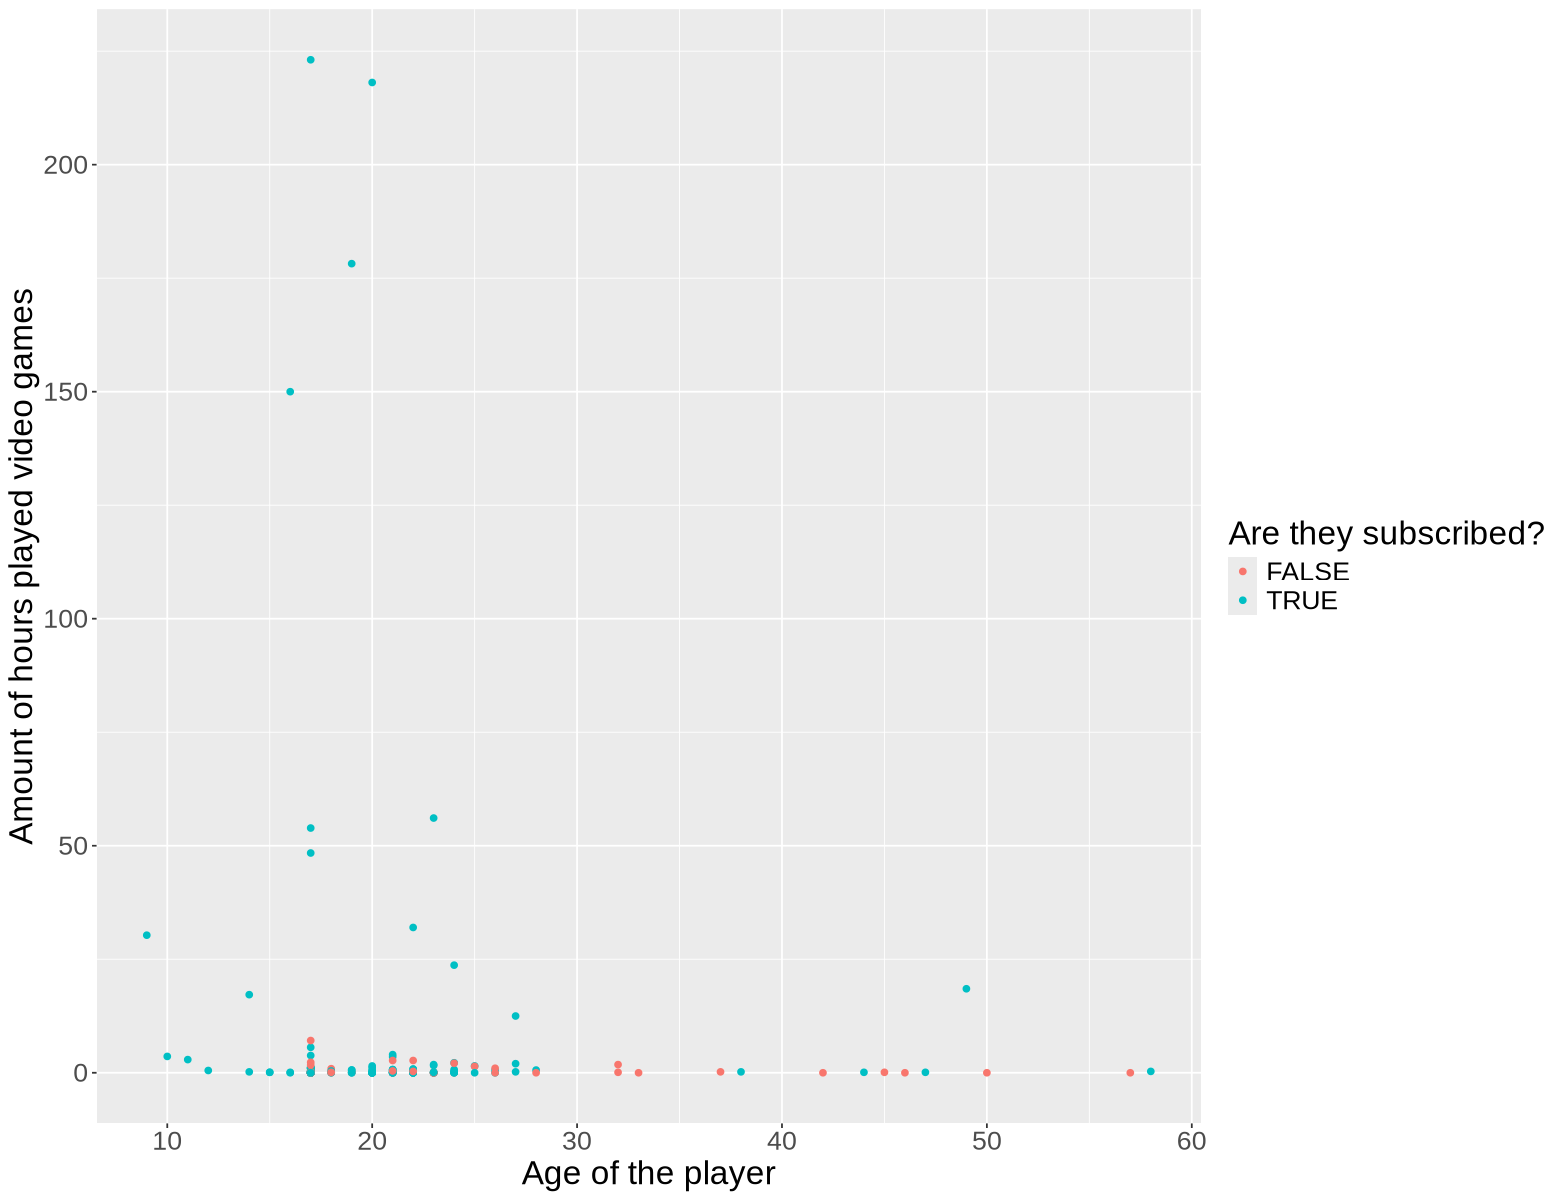

In [6]:
# Visualisations
options(repr.plot.width = 13, repr.plot.height = 10)
played_hrs_vs_age <- ggplot(tidy_players, aes(x = Age, y = played_hours, color = subscribe)) +
    geom_point() +
    labs(x = "Age of the player", y = "Amount of hours played video games", color = "Are they subscribed?") + 
    theme(text = element_text(size = 20))
played_hrs_vs_age

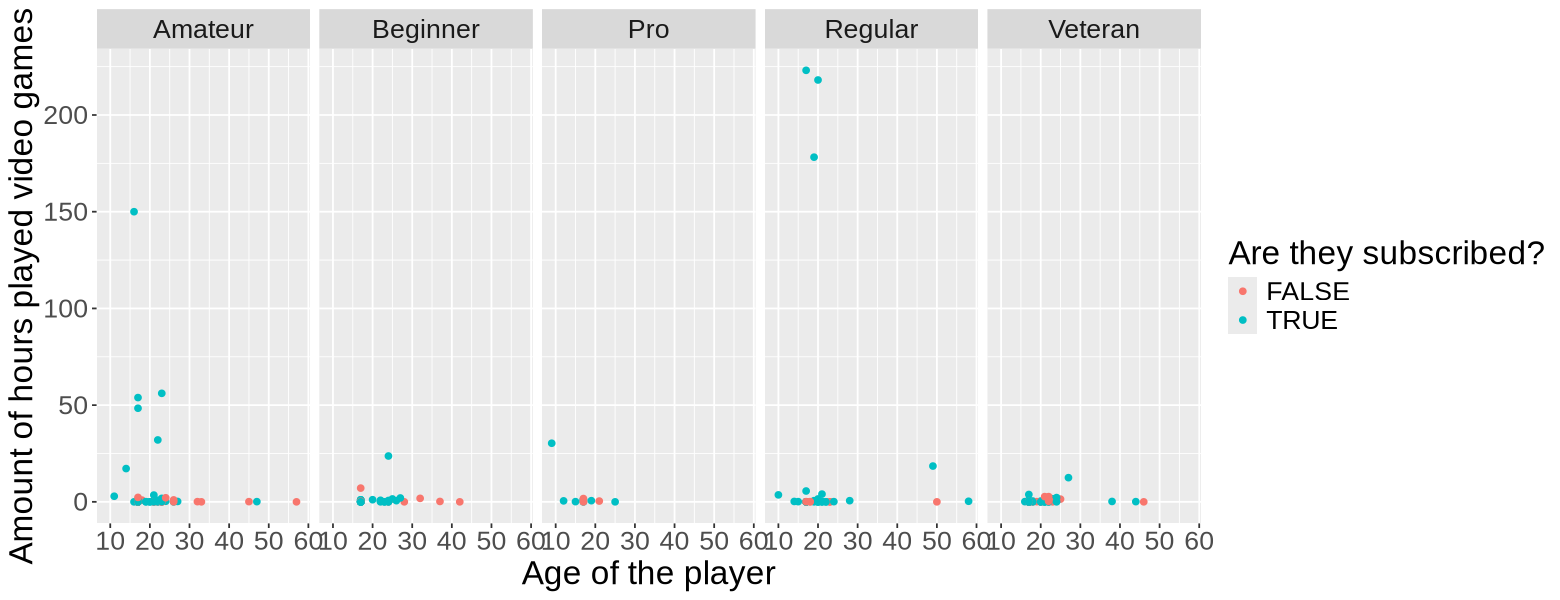

In [7]:
options(repr.plot.width = 13, repr.plot.height = 5)
played_hrs_vs_age <- ggplot(tidy_players, aes(x = Age, y = played_hours, color = subscribe)) +
    geom_point() +
    facet_grid(~ experience) +
    labs(x = "Age of the player", y = "Amount of hours played video games", color = "Are they subscribed?") + 
    theme(text = element_text(size = 20))
played_hrs_vs_age

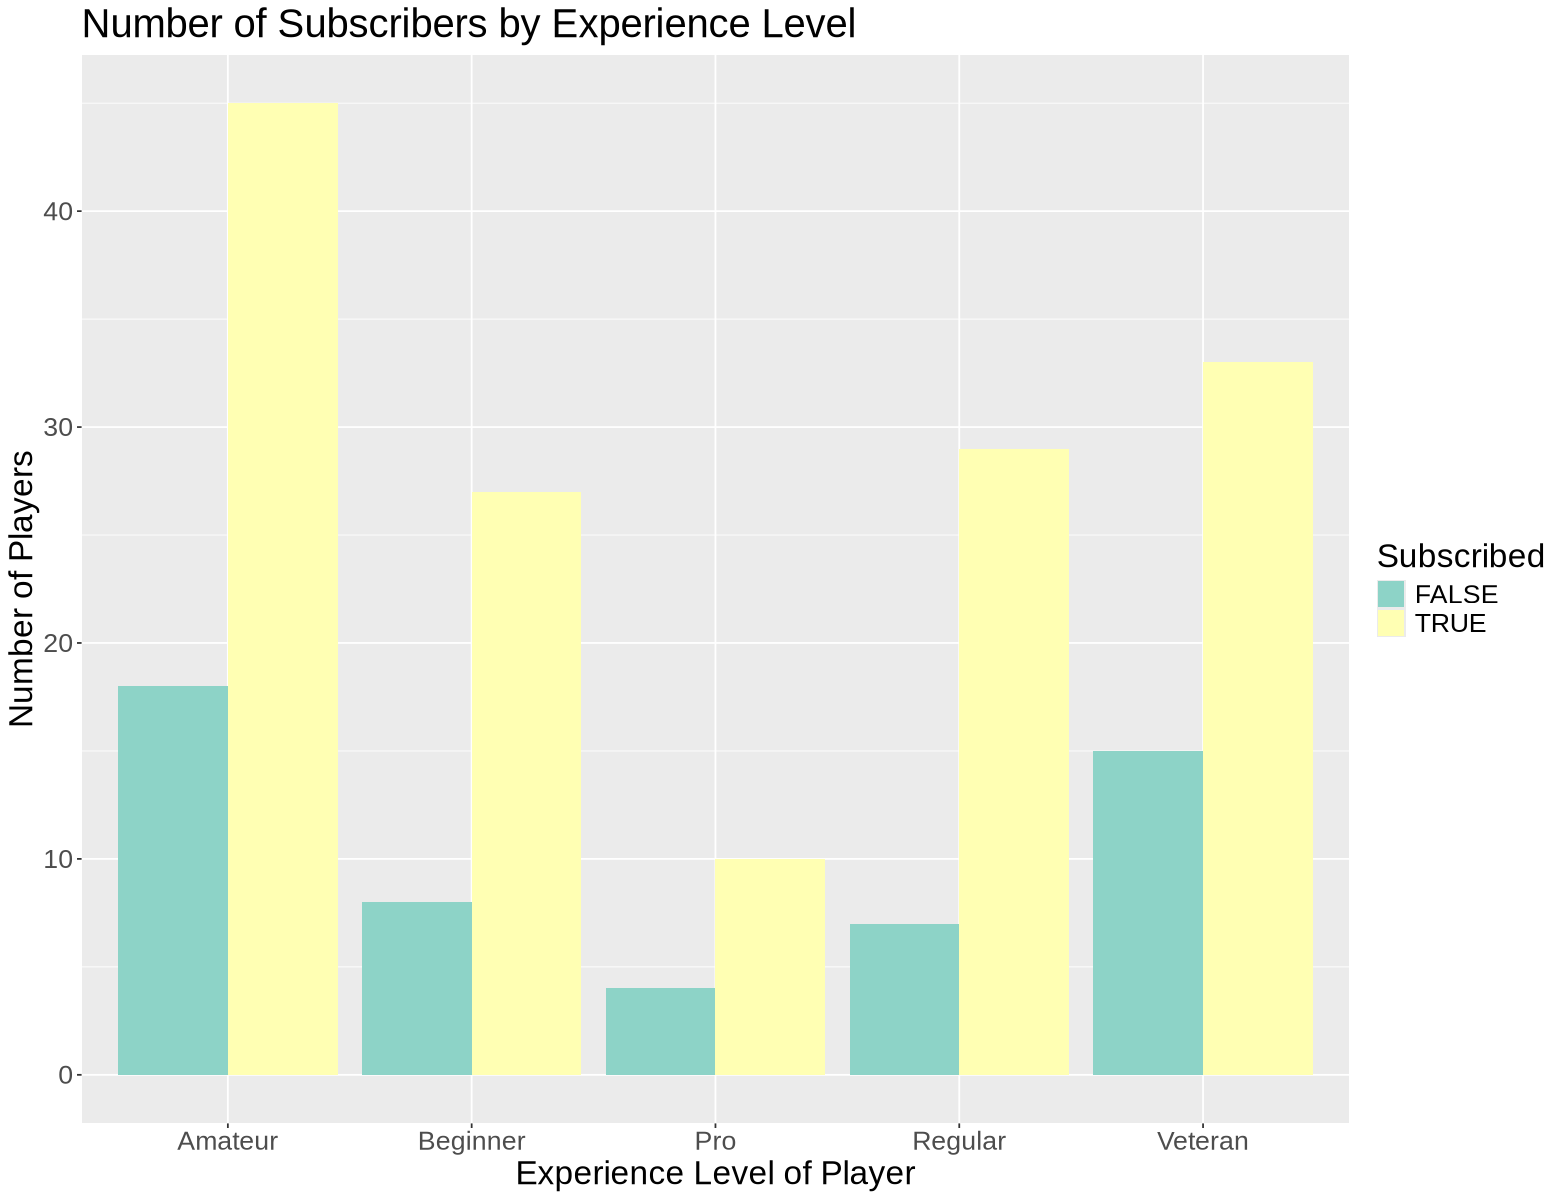

In [8]:
options(repr.plot.height = 10, repr.plot.width = 13)

experience_subs_plot <- players |>
    ggplot(aes(x = experience, fill = subscribe)) +
    geom_bar(position = "dodge") + 
    scale_fill_brewer(palette = "Set3") +
    labs(
        x = "Experience Level of Player", 
        y = "Number of Players", 
        fill = "Subscribed"
        ) +
    ggtitle("Number of Subscribers by Experience Level") + 
    theme(text = element_text(size = 20)) 
experience_subs_plot

In [11]:
set.seed(9999) 

knn_split <- initial_split(tidy_players, prop = 0.75, strata = played_hours)
knn_train <- training(knn_split)
knn_test <- testing(knn_split)

knn_recipe <- recipe(subscribe ~ played_hours + Age, data = knn_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())
knn_recipe

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

knn_vfold <- vfold_cv(knn_train, v = 5, strata = subscribe)

k_vals <- tibble(neighbors = seq(from = 3, to = 20, by = 1))

knn_fit <- workflow() |>
    add_recipe(knn_recipe) |>
    add_model(knn_spec) |>
    tune_grid(resamples = knn_vfold, grid = k_vals) |>
    collect_metrics()

# best_k <- players_fit |>
# filter(.metric == "accuracy") |>
# slice_max(mean)
# best_k

# best_k_plot <- players_fit |>
# filter(.metric == "accuracy") |>
# ggplot(aes(x = neighbors, y = mean)) +
# geom_line() +
# geom_point() + 
# labs(x = "k (neighbors)", y = "Mean Accuracy") +
# ggtitle("Accuracy vs Number of Neighbors (k)") +
# theme(text = element_text(size = 20)) 
# best_k_plot




── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 2



── Operations 

• Scaling for: all_predictors()

• Centering for: all_predictors()



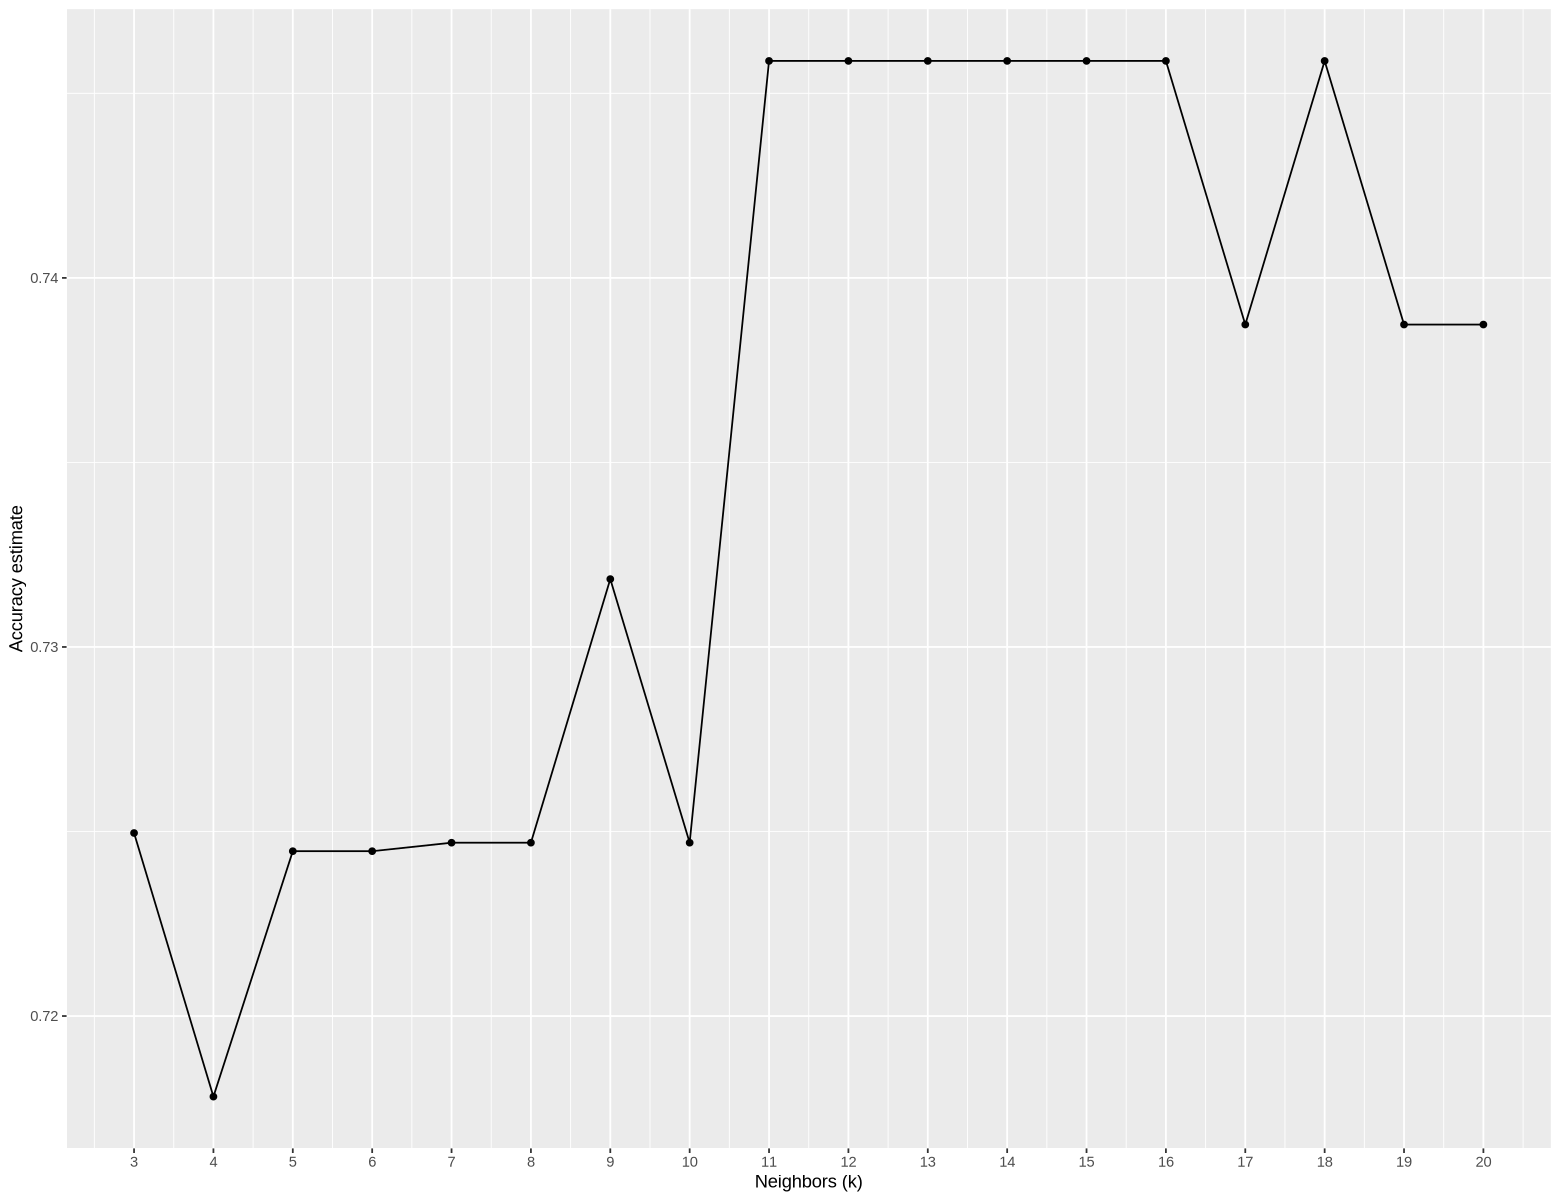

In [12]:
accuracies <- knn_fit |>
    filter(.metric == "accuracy")

cross_val_plot <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Neighbors (k)", y = "Accuracy estimate") +
    scale_x_continuous(breaks = seq(3, 20, by = 1))
cross_val_plot

This plot is not what is typically expected when we make a best k plot, as it would usually come out as an elbow plot. We decided to choose k = 11 for our best k value because it is the smallest k value that has the highest accuracy. 

In [13]:
players_spec<- nearest_neighbor(weight_func = "rectangular", neighbors = 11) |>
set_engine("kknn") |>
set_mode("classification")
players_fit<-workflow() |>
add_recipe(knn_recipe) |>
add_model(players_spec) |>
fit(data = knn_train)
players_fit

players_predictions<-predict(players_fit , knn_test) |>
bind_cols(knn_test)
players_metrics<-players_predictions |>
metrics(truth = subscribe, estimate = .pred_class)   
players_conf_mat<- players_predictions|> 
conf_mat(truth = subscribe, estimate = .pred_class)
players_predictions
players_metrics
players_conf_mat

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(11,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.2413793
Best kernel: rectangular
Best k: 11

.pred_class,experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<fct>,<fct>,<chr>,<dbl>,<chr>,<chr>,<dbl>
TRUE,Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
TRUE,Veteran,TRUE,7a4686586d290c67179275c7c3dfb4ea02f4d317d9ee0e2cee98baa27877a875,1.6,Lane,Female,23
TRUE,Amateur,TRUE,3caa832978e0596779f4ee7c686c4592fb6de893925025d25bf26be9a8cd03f5,0.2,Thatcher,Male,22
TRUE,Amateur,FALSE,200db0417ee70863c7e2a0f214c737476fb86de5869d0b907a077d726357e687,0.1,Anastasia,Female,17
TRUE,Beginner,TRUE,89c8e07d6a2aa102d9cd05086d51b2e41195c9c807dd976a06f4262ff36d0cca,0.0,Ren,Male,17
TRUE,Regular,TRUE,5baba1651a0b92788bc0d6dcdf00be64af1cf9f0015bbeed204ddabd1d872e83,0.6,Kendall,Female,28
TRUE,Amateur,TRUE,710148466b44cb02ba894aa9005a4892e619250ebd01153055d6c7578fc1ea10,0.1,Ayman,Male,23
TRUE,Veteran,TRUE,577aa5f15468252b1c6f32dcd515012923476292e30f95e6b4128c770e993f92,0.1,Winston,Male,17
TRUE,Regular,FALSE,453774822d52d6891593948224570a750c4334616ff8aa74cd61fad9d4855752,0.0,Edmund,Prefer not to say,23


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.6938776
kap,binary,0.1197605


          Truth
Prediction FALSE TRUE
     FALSE     2    1
     TRUE     14   32